<h1>Sampling Distribution for X-Bar (Simplified)</h1>

<font size=4><p>Use this Notebook to simulate sampling distributions to help your kids verify the Central Limit Theorem</p>
<p><ol><li>Change the numbers for each coin to create different populations, creating different mean values, but also try it with different shaped distributions of coins.</li>
<li>Change the sample size to verify its effect on the standard deviation formula for sampling distributions for sample means.</li>
<li>You can change the number of samples you use to simulate the sampling distribution. The Law of Large Numbers will lead the mean of the simulated sampling distribution to approach the population mean, and lead the standard deviation of the simulated sampling distribution to approach the standard deviation of the actual sampling distribution.</li></font>

<h4>Import Python Libraries</h4>

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore",DeprecationWarning)

<h4>Create the Simulated the Sampling Distribution</h4>


********************************************************************************************************************
Simulated Sampling Distribution for  20000  samples of size  100  vs Distribution of Population.
********************************************************************************************************************
The mean value of your simulated sampling distribution for samples of  100  coins is $ 0.1835  and the standard deviation of the sampling distribution is $ 0.0093 .
********************************************************************************************************************
The mean coin value of your  10000  coins is $ 0.1835  and the standard deviation of the values of your coins is $ 0.0933 .
********************************************************************************************************************



Text(0.5, 1.0, 'Simulated Sampling Distribution')

<Figure size 640x480 with 0 Axes>

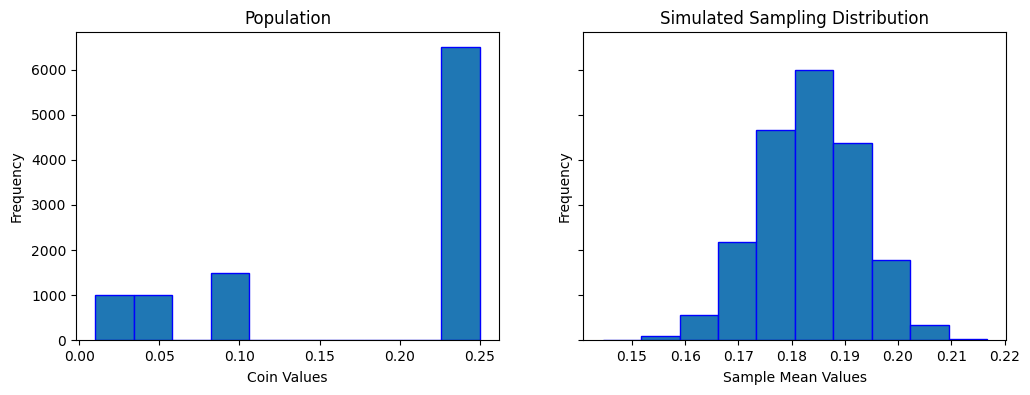

In [8]:
#Edit the number of pennies, nickels, dimes, and quarters to create the population of coins. It is originally set as a left-skewed distribution of 1000 coins.
p = 1000
n = 1000
d = 1500
q = 6500

#Edit the sample size to see its effect on the simulated sampling distribution.
#Edit the number of samples used to simulate the sampling distribution. The Law of Large Numbers will lead the characteristics of the simulated sampling distribution to approach the characteristics of the actual sampling distribution as the number of samples increases.
samp_size = 100
num_samples = 20000

#**************************************************
#****** DO NOT EDIT THE CODE BELOW THIS LINE ******
N = p + n + d + q
COINS = N*[0]
for i in range(0,p):
    COINS[i] = 0.01
for i in range(p,p+n):
    COINS[i] = 0.05
for i in range(p+n,p+n+d):
    COINS[i] = 0.10
for i in range(p+n+d,N):
    COINS[i] = 0.25
coins = pd.DataFrame(COINS)

#Generate Sample Means
samp_means = [0]*num_samples
sum = 0
x = 0
for i in range(0,num_samples):
    for j in range(0,samp_size):
        x = rd.randint(0,N - 1)
        if x < p:
            sum = sum + 0.01
        elif x < p + n:
            sum = sum + 0.05
        elif x < p + n + d:
            sum = sum + 0.10
        else:
            sum = sum + 0.25
    samp_means[i] = sum/samp_size
    sum = 0
SAMP_MEANS = pd.DataFrame(samp_means)
#Print and Graph
print('')
print('********************************************************************************************************************')
print('Simulated Sampling Distribution for ', num_samples, ' samples of size ', samp_size, ' vs Distribution of Population.')
print('********************************************************************************************************************')
print('The mean value of your simulated sampling distribution for samples of ',samp_size,' coins is $', format(SAMP_MEANS[0].mean(),'.4f'), ' and the standard deviation of the sampling distribution is $', format(SAMP_MEANS[0].std(),'.4f'),'.')
print('********************************************************************************************************************')
print('The mean coin value of your ',N,' coins is $', format(coins[0].mean(),'.4f'), ' and the standard deviation of the values of your coins is $', format(coins[0].std(),'.4f'),'.')
print('********************************************************************************************************************')
print('')

f = plt.figure()
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,4), sharex=False, sharey = True)

axes[0].hist(coins, ec = 'b')
axes[0].set_xlabel('Coin Values', labelpad = 5)
axes[0].set_ylabel('Frequency', labelpad = 5)
axes[0].set_title('Population')

axes[1].hist(SAMP_MEANS, ec = 'b')
axes[1].set_xlabel('Sample Mean Values', labelpad = 5)
axes[1].set_ylabel('Frequency', labelpad = 5)
axes[1].set_title('Simulated Sampling Distribution')